## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

## Loading data

##### CSV file encoding check

In [2]:
with open('../data/sales_data.csv') as f:
    print(f)

<_io.TextIOWrapper name='../data/sales_data.csv' mode='r' encoding='cp1250'>


##### CSV file loading

In [3]:
df = pd.read_csv('../data/sales_data.csv', encoding='cp1250')
pd.set_option('display.max_columns', None)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.shape

(2823, 25)

## Data cleaning

##### 1.Duplicates.

In [5]:
duplicates_order = df[df.duplicated(subset=['ORDERNUMBER'], keep=False)]
duplicates_order = duplicates_order.sort_values(by='ORDERNUMBER')
duplicates_order.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
578,10100,30,100.00,3,5151.00,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,170,S18_1749,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
1267,10100,22,86.51,4,1903.22,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,92,S18_4409,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
680,10100,50,67.80,2,3390.00,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,60,S18_2248,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
2024,10100,49,34.47,1,1689.03,1/6/2003 0:00,Shipped,1,1,2003,Vintage Cars,41,S24_3969,Online Diecast Creations Co.,6035558647,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
728,10101,25,100.00,4,3782.00,1/9/2003 0:00,Shipped,1,1,2003,Vintage Cars,127,S18_2325,"Blauer See Auto, Co.",+49 69 66 90 2555,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Medium


In [6]:
duplicates_order.shape

(2807, 25)

In [7]:
num_duplicates = df.duplicated(keep='first').sum()
num_duplicates

0

##### SUMMARY: *There aren't any essential duplicates.*

##### 2.Handling NaN, None, Null.

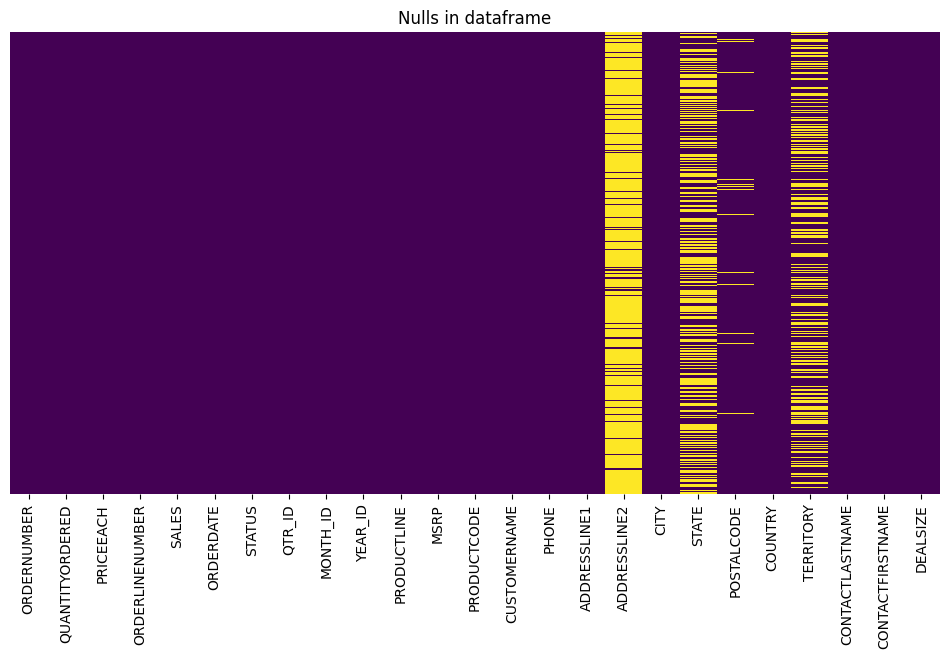

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Nulls in dataframe')
plt.savefig('../images/isnull.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
df['ADDRESSLINE2'].isnull().sum()

2521

In [10]:
df.shape

(2823, 25)

In [11]:
df.fillna(value='Unknown', inplace=True)

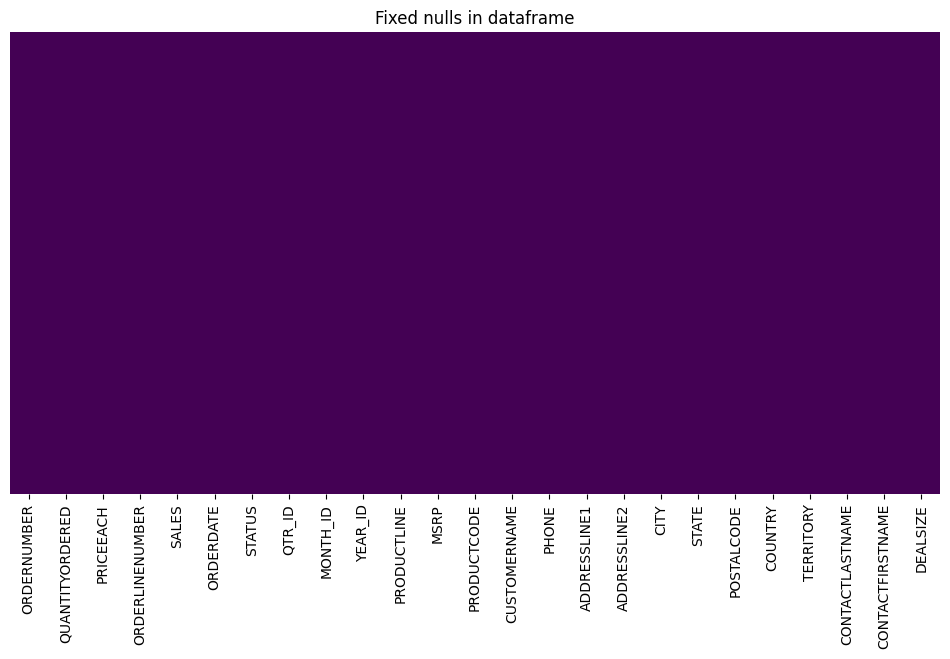

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Fixed nulls in dataframe')
plt.savefig('../images/isnull_fixed.png', dpi=300, bbox_inches='tight')
plt.show()

##### SUMMARY: *I replaced all nulls with string 'Unknown'.*

##### 3.Fixing columns data types.

In [13]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [14]:
pd.set_option('display.max_rows', None)
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,Unknown,NYC,NY,10022,USA,Unknown,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Unknown,Reims,Unknown,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Unknown,Paris,Unknown,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Unknown,Pasadena,CA,90003,USA,Unknown,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,Unknown,San Francisco,CA,Unknown,USA,Unknown,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Unknown,Burlingame,CA,94217,USA,Unknown,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,Motorcycles,95,S10_1678,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",Unknown,Lille,Unknown,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,Motorcycles,95,S10_1678,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Unknown,Bergen,Unknown,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,Motorcycles,95,S10_1678,Mini Wheels Co.,6505555787,5557 North Pendale Street,Unknown,San Francisco,CA,Unknown,USA,Unknown,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,Motorcycles,95,S10_1678,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",Unknown,Paris,Unknown,75016,France,EMEA,Perrier,Dominique,Medium


In [15]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce', format='%m/%d/%Y %H:%M')
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,Unknown,NYC,NY,10022,USA,Unknown,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Unknown,Reims,Unknown,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Unknown,Paris,Unknown,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Unknown,Pasadena,CA,90003,USA,Unknown,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,Unknown,San Francisco,CA,Unknown,USA,Unknown,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,2003-10-28,Shipped,4,10,2003,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Unknown,Burlingame,CA,94217,USA,Unknown,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,2003-11-11,Shipped,4,11,2003,Motorcycles,95,S10_1678,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",Unknown,Lille,Unknown,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,2003-11-18,Shipped,4,11,2003,Motorcycles,95,S10_1678,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Unknown,Bergen,Unknown,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,2003-12-01,Shipped,4,12,2003,Motorcycles,95,S10_1678,Mini Wheels Co.,6505555787,5557 North Pendale Street,Unknown,San Francisco,CA,Unknown,USA,Unknown,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,2004-01-15,Shipped,1,1,2004,Motorcycles,95,S10_1678,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",Unknown,Paris,Unknown,75016,France,EMEA,Perrier,Dominique,Medium


##### SUMMARY: *Only dates needed to be convertet into datetime type. In case of using machine learning I will consider converting some columns into categorical type.*

##### 4.Changing columns names.

In [16]:
df.rename(columns={'MSRP': 'RECOMMENDEDPRICE', 'CUSTOMERNAME': 'COMPANYNAME', 'CONTACTLASTNAME': 'LASTNAME', 'CONTACTFIRSTNAME': 'FIRSTNAME'}, inplace=True)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,RECOMMENDEDPRICE,PRODUCTCODE,COMPANYNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,LASTNAME,FIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,Unknown,NYC,NY,10022,USA,Unknown,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Unknown,Reims,Unknown,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Unknown,Paris,Unknown,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Unknown,Pasadena,CA,90003,USA,Unknown,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,Unknown,San Francisco,CA,Unknown,USA,Unknown,Brown,Julie,Medium


##### 5.Checking if there are negative or equal to zero intigers/floats.

In [17]:
df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
RECOMMENDEDPRICE             int64
PRODUCTCODE                 object
COMPANYNAME                 object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
LASTNAME                    object
FIRSTNAME                   object
DEALSIZE                    object
dtype: object

In [18]:
(df[['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'RECOMMENDEDPRICE']] <= 0).any()

ORDERNUMBER         False
QUANTITYORDERED     False
PRICEEACH           False
ORDERLINENUMBER     False
SALES               False
QTR_ID              False
MONTH_ID            False
YEAR_ID             False
RECOMMENDEDPRICE    False
dtype: bool

##### 6.Removing unnecessary columns for analysis.

##### NOTE: *I should have done this step at the beginning, but I didn't do it due to the demonstration purpose of the project.*

In [19]:
df.drop(['ORDERLINENUMBER', 'STATUS', 'QTR_ID', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY', 'LASTNAME', 'FIRSTNAME'], axis=1, inplace=True, errors='raise')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,MONTH_ID,YEAR_ID,PRODUCTLINE,RECOMMENDEDPRICE,PRODUCTCODE,COMPANYNAME,CITY,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,2003-02-24,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Small
1,10121,34,81.35,2765.90,2003-05-07,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Small
2,10134,41,94.74,3884.34,2003-07-01,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Medium
3,10145,45,83.26,3746.70,2003-08-25,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Medium
4,10159,49,100.00,5205.27,2003-10-10,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,Medium


## Agument data with additional columns

##### Creating a year and month column for the demonstration of question no. 5.

In [20]:
df['YEAR'] = df['ORDERDATE'].dt.year
df['MONTH'] = df['ORDERDATE'].dt.month

## EDA - Exploratory Data Analysis

In [21]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'ORDERDATE',
       'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'RECOMMENDEDPRICE', 'PRODUCTCODE',
       'COMPANYNAME', 'CITY', 'COUNTRY', 'DEALSIZE', 'YEAR', 'MONTH'],
      dtype='object')

In [22]:
df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [23]:
df['COUNTRY'].value_counts()

COUNTRY
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: count, dtype: int64

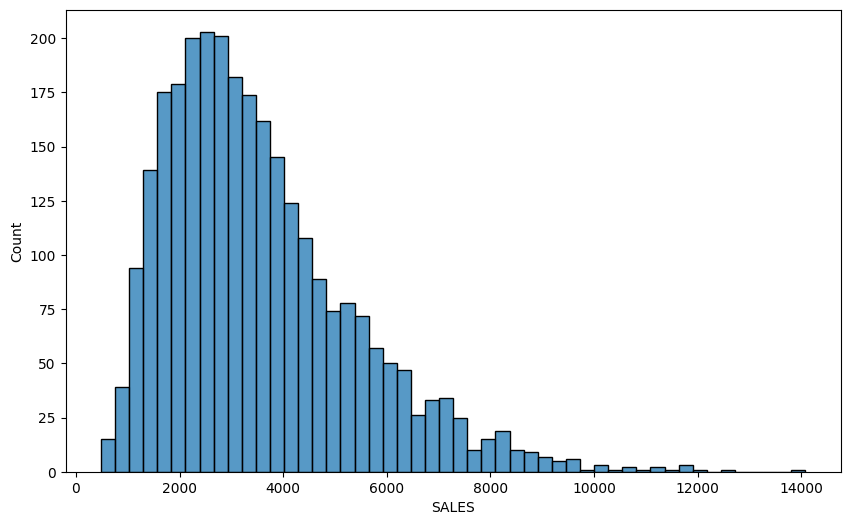

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SALES'], bins=50)
plt.savefig('../images/sales_count_histplot.png', dpi=300, bbox_inches='tight')
plt.show()

##### NOTE: *Asymmetric sales value indicates transaction values ​​clustered mostly around 3000, with a decreasing trend towards larger orders from large customers.*

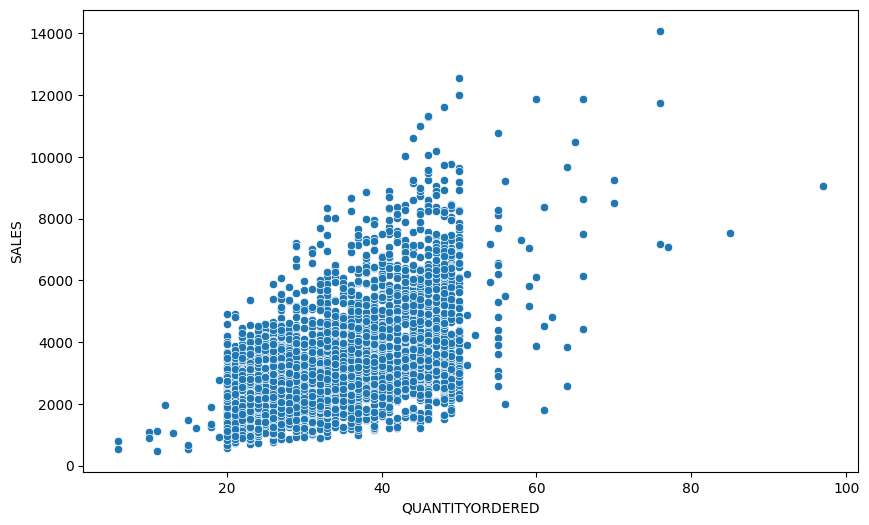

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='QUANTITYORDERED', y='SALES', data=df)
plt.savefig('../images/quantityordered_scatterplot.png', dpi=300, bbox_inches='tight')
plt.show()

##### NOTE: *The lower part of the graph shows a natural increase in sales value with an increase in the number of cheaper products sold. The upper part of the graph clearly shows a dynamic increase in sales with an increase in the number of more expensive products. However, the main range of transaction values ​​increases slightly in relation to the increased number of products ordered.*

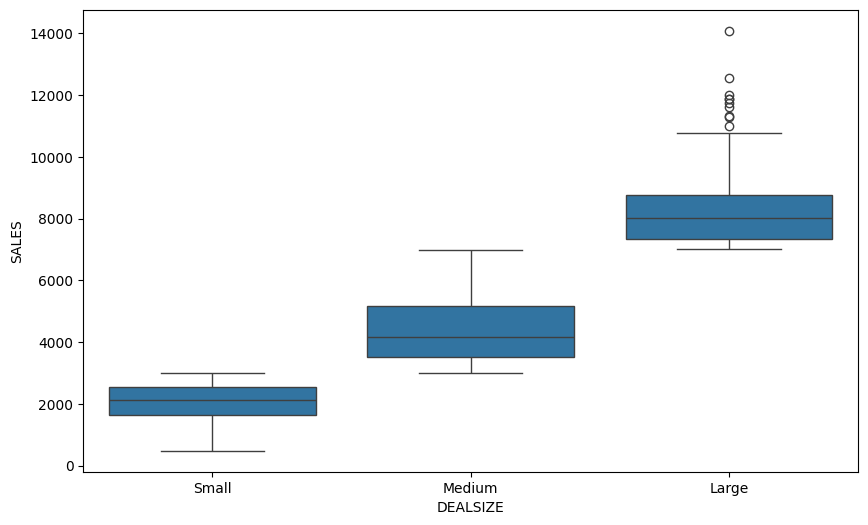

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEALSIZE', y='SALES', data=df)
plt.savefig('../images/dealsize_sale_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

##### NOTE: *The smallest part of the sale with the smallest spread is DEALSIZE SMALL. For transactions defined as medium and large, the spread is larger and similar between them, with a significant indication of unusual special and very large orders in DEALSIZE LARGE.*

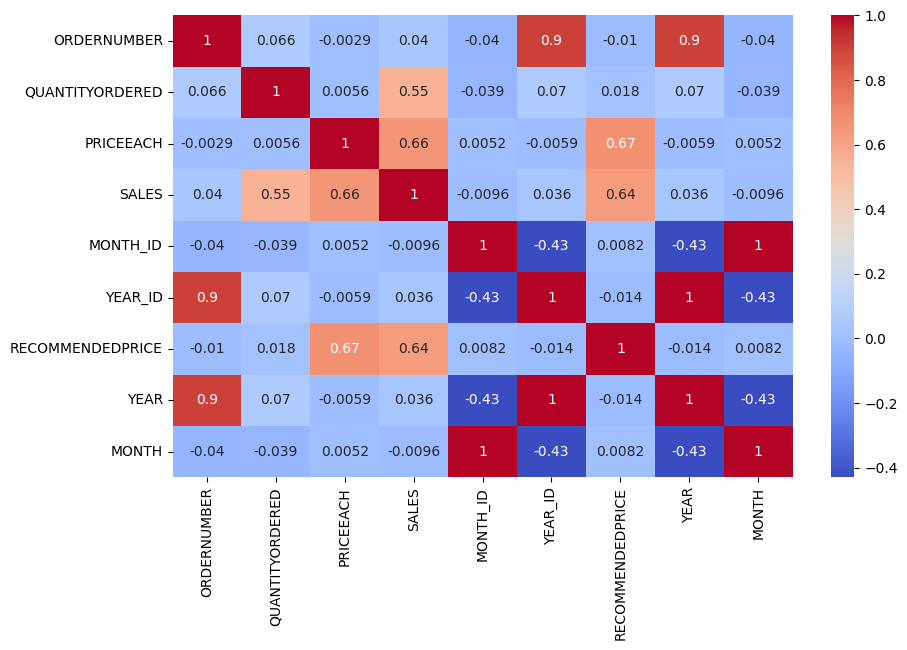

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.savefig('../images/corr_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

##### NOTE: *A clear correlation between product price, quantity ordered and total sales is obvious. The high correlation between year and order number is due to the way the order number is created, which uses the current date. The recommended price is relatively strongly correlated with the sales price, but at the same time it indicates a difference in the final price and the recommended price often offered.*

## Questions for analysis

##### **Question 1: Which month had the highest sales?**

In [28]:
monthly_sales = df.groupby(['YEAR', 'MONTH'])['SALES'].sum().reset_index()
monthly_sales

,YEAR,MONTH,SALES
0,2003,1,129753.60
1,2003,2,140836.19
2,2003,3,174504.90
3,2003,4,201609.55
4,2003,5,192673.11
5,2003,6,168082.56
6,2003,7,187731.88
7,2003,8,197809.30
8,2003,9,263973.36
9,2003,10,568290.97


##### NOTE: *The data set includes two full years and one only through May. The last year will not be included in this list.*

In [29]:
temp_df = df.drop(['ORDERDATE'], axis=1)
temp_df = temp_df[temp_df['YEAR_ID'] != '2005']
sales_df = temp_df.groupby('MONTH_ID')['SALES'].sum()
sales_df

MONTH_ID
1      785874.44
2      810441.90
3      754501.39
4      669390.96
5      923972.56
6      454756.78
7      514875.97
8      659310.57
9      584724.27
10    1121215.22
11    2118885.67
12     634679.12
Name: SALES, dtype: float64

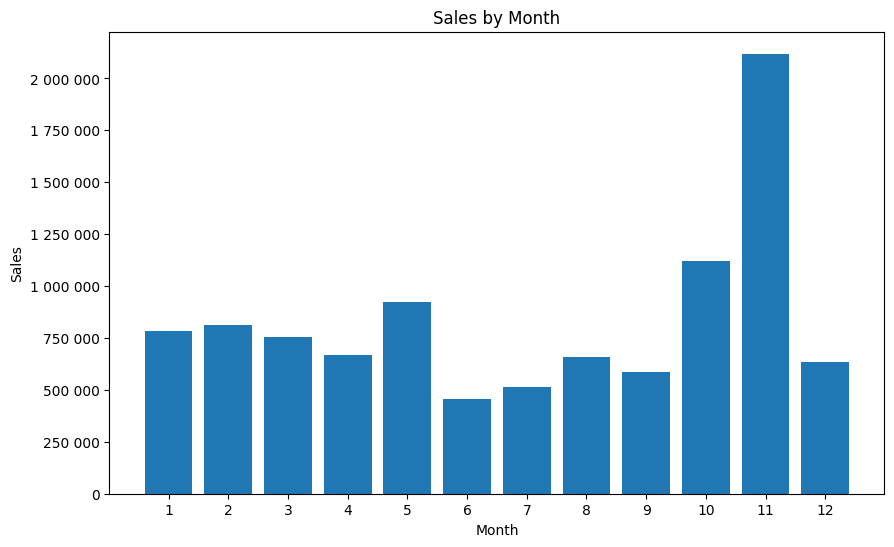

In [30]:
months = range(1, 13)
formatter = FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' '))

plt.figure(figsize=(10, 6))
plt.bar(months, sales_df)
plt.xticks(months)
plt.ylabel('Sales')
plt.xlabel('Month')
plt.title('Sales by Month')
plt.gca().yaxis.set_major_formatter(formatter)
plt.savefig('../images/month_sales_bar.png', dpi=300, bbox_inches='tight')
plt.show()

##### SUMMARY: *The highest sales activity (almost double) occurs in November, which is most likely due to the approaching holiday season. October and November are good months for an advertising campaign. Please note that there is no data above May for the last year, so the sales graph for the following months would be even higher. More in Question 5.*

##### **Question 2: Which productlines sold the best?**

In [31]:
temp_df = df.drop(['ORDERDATE'], axis=1)
product_sales_df = temp_df.groupby('PRODUCTLINE')['SALES'].sum()
product_sales_df

PRODUCTLINE
Classic Cars        3919615.66
Motorcycles         1166388.34
Planes               975003.57
Ships                714437.13
Trains               226243.47
Trucks and Buses    1127789.84
Vintage Cars        1903150.84
Name: SALES, dtype: float64

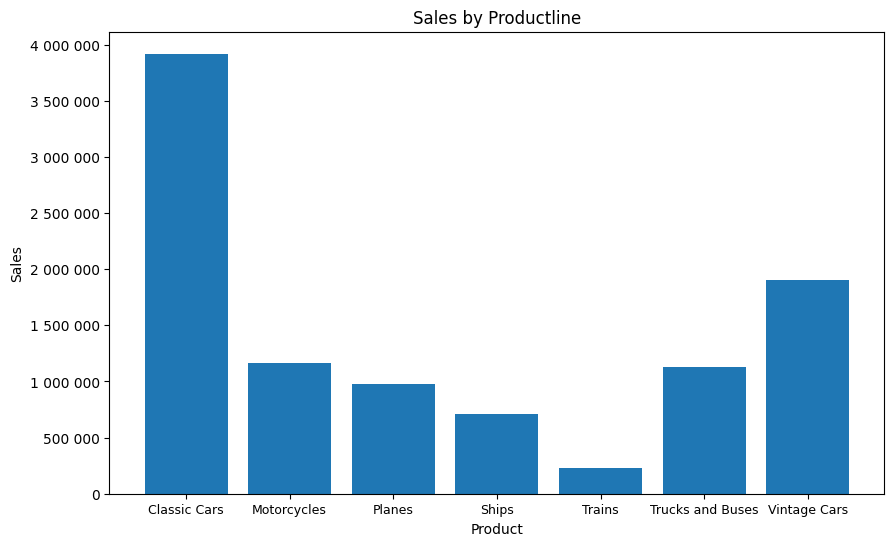

In [32]:
product = [prod for prod, df in df.groupby('PRODUCTLINE')]
formatter = FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' '))

plt.figure(figsize=(10, 6))
plt.bar(product, product_sales_df)
plt.xticks(product, size=9)
plt.ylabel('Sales')
plt.xlabel('Product')
plt.title('Sales by Productline')
plt.gca().yaxis.set_major_formatter(formatter)
plt.savefig('../images/productline_sales_bar.png', dpi=300, bbox_inches='tight')
plt.show()

##### SUMMARY: *The classic car series is almost twice as popular.*

##### **Question 3: Which country generated the most revenue?**

In [33]:
temp_df = df.drop(['ORDERDATE'], axis=1)
country_sales_df = temp_df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)
country_sales_df

COUNTRY
USA            3627982.83
Spain          1215686.92
France         1110916.52
Australia       630623.10
UK              478880.46
Italy           374674.31
Finland         329581.91
Norway          307463.70
Singapore       288488.41
Denmark         245637.15
Canada          224078.56
Germany         220472.09
Sweden          210014.21
Austria         202062.53
Japan           188167.81
Switzerland     117713.56
Belgium         108412.62
Philippines      94015.73
Ireland          57756.43
Name: SALES, dtype: float64

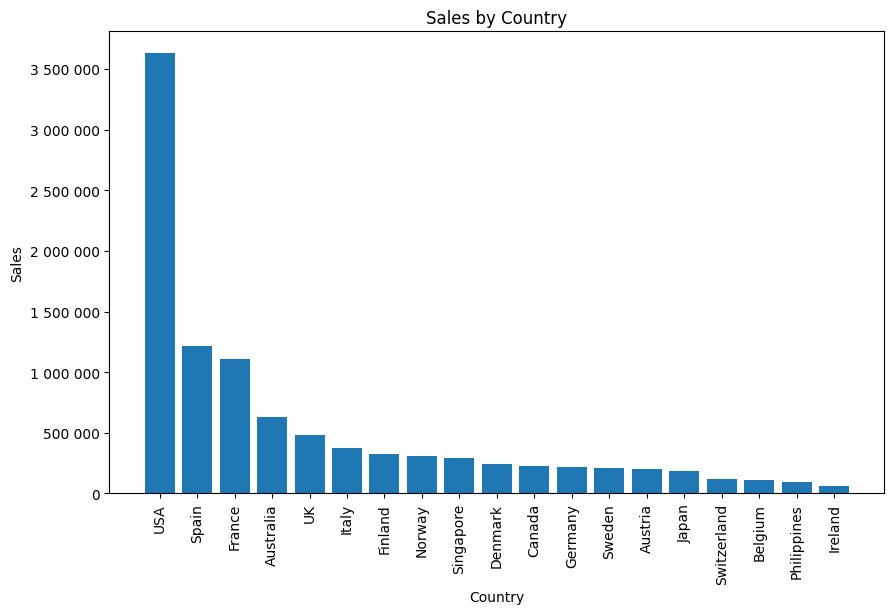

In [34]:
formatter = FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' '))
plt.figure(figsize=(10, 6))
plt.bar(country_sales_df.index, country_sales_df.values)
plt.xticks(rotation='vertical')
plt.ylabel('Sales')
plt.xlabel('Country')
plt.title('Sales by Country')
plt.gca().yaxis.set_major_formatter(formatter)
plt.savefig('../images/country_sales_bar.png', dpi=300, bbox_inches='tight')
plt.show()

##### SUMMARY: *The main sales are in the US but the dataset contains too little data to clearly determine what is causing this. The primary and initial sales target may be the US.*

##### **Question 4: Which customer generates the largest orders and how are they related to the number of products ordered?**

In [35]:
temp_df = df.drop(['ORDERDATE'], axis=1)
customer_quantity_sales_df = temp_df.groupby('COMPANYNAME')[['SALES', 'QUANTITYORDERED']].sum().sort_values(by='SALES', ascending=False)
customer_quantity_sales_df.head()

,SALES,QUANTITYORDERED
COMPANYNAME,,
Euro Shopping Channel,912294.11,9327
Mini Gifts Distributors Ltd.,654858.06,6366
"Australian Collectors, Co.",200995.41,1926
Muscle Machine Inc,197736.94,1775
La Rochelle Gifts,180124.90,1832


In [36]:
customer_quantity_sales_df.shape

(92, 2)

In [37]:
customer_quantity_sales_df = customer_quantity_sales_df.iloc[:15]
customer_quantity_sales_df

,SALES,QUANTITYORDERED
COMPANYNAME,,
Euro Shopping Channel,912294.11,9327
Mini Gifts Distributors Ltd.,654858.06,6366
"Australian Collectors, Co.",200995.41,1926
Muscle Machine Inc,197736.94,1775
La Rochelle Gifts,180124.90,1832
"Dragon Souveniers, Ltd.",172989.68,1524
Land of Toys Inc.,164069.44,1631
The Sharp Gifts Warehouse,160010.27,1656
"AV Stores, Co.",157807.81,1778


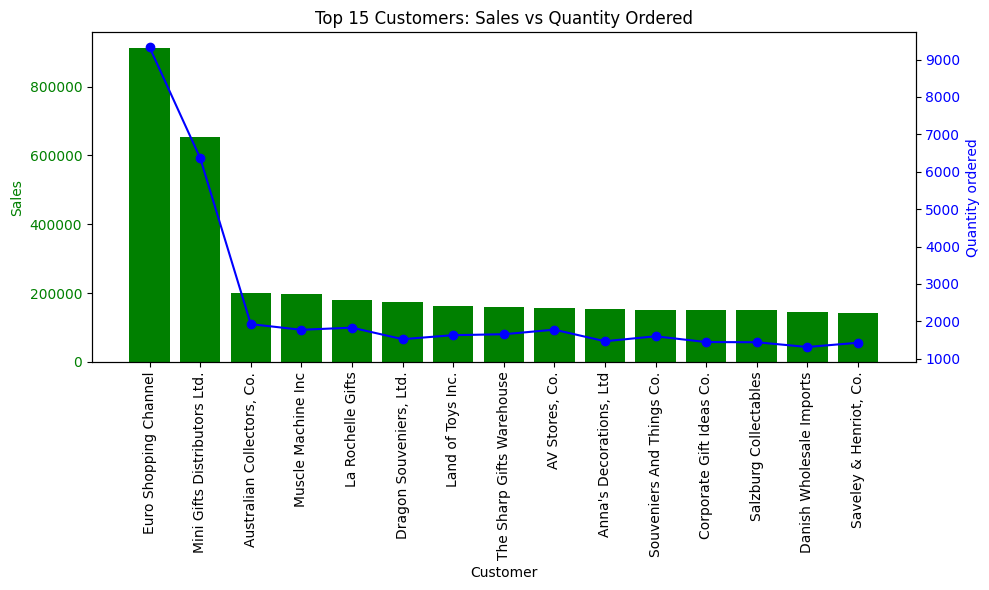

In [38]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(customer_quantity_sales_df.index, customer_quantity_sales_df['SALES'], color='g')
ax1.set_xlabel('Customer')
ax1.set_ylabel('Sales', color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
ax2.plot(customer_quantity_sales_df.index, customer_quantity_sales_df['QUANTITYORDERED'], 'b-o')
ax2.set_ylabel('Quantity ordered', color='b')
ax2.tick_params(axis='y', labelcolor='b')

plt.title('Top 15 Customers: Sales vs Quantity Ordered')
plt.tight_layout()
plt.savefig('../images/csutomer_quantity_sales_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

##### SUMMARY: *Two customers clearly dominate sales. The increase in the value of products sold is proportionally correlated with the increase in the number of products sold. There is no visible relationship between the number of products sold and their price (e.g. the customer focuses mainly on more expensive products represented by sales, but in smaller quantities. Maybe Dragon Souveniers or Danish Wholesale Imports are worth considering)*

##### **Question 5: Is there seasonality in sales?**

In [39]:
monthly_sales = df.groupby(['YEAR', 'MONTH'])['SALES'].sum().reset_index()
pivot_df = monthly_sales.pivot(index='MONTH', columns='YEAR', values='SALES').sort_index()
pivot_df

YEAR,2003,2004,2005
MONTH,,,
1,129753.60,316577.42,339543.42
2,140836.19,311419.53,358186.18
3,174504.90,205733.73,374262.76
4,201609.55,206148.12,261633.29
5,192673.11,273438.39,457861.06
6,168082.56,286674.22,NaN
7,187731.88,327144.09,NaN
8,197809.30,461501.27,NaN
9,263973.36,320750.91,NaN


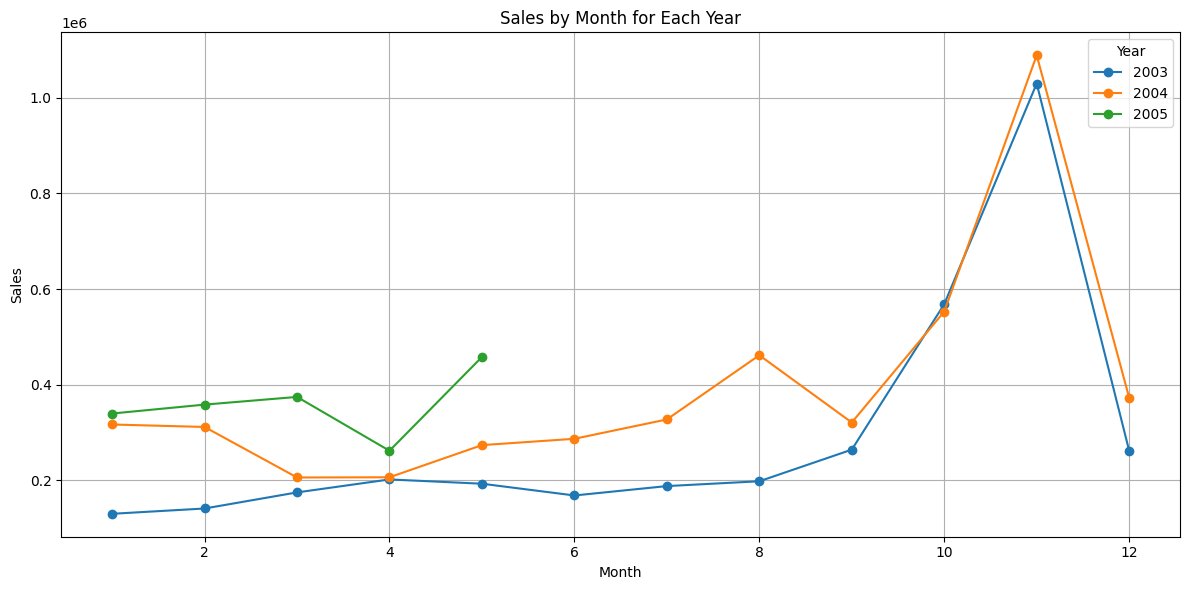

In [40]:
plt.figure(figsize=(12, 6))

for year in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[year], marker='o', label=str(year))

plt.title('Sales by Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.savefig('../images/sales_by_month_per_year.png', dpi=300)
plt.show()


##### SUMMARY: *According to the results from Question 1, the best sales season is the fourth quarter.*